<a href="https://colab.research.google.com/github/padmini1204/aicte_edunet_internship/blob/main/aicte_edunet_microsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 52ms/step - accuracy: 0.8944 - loss: 0.3550 - val_accuracy: 0.9814 - val_loss: 0.0558
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.9844 - loss: 0.0510 - val_accuracy: 0.9866 - val_loss: 0.0411
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9892 - loss: 0.0327 - val_accuracy: 0.9887 - val_loss: 0.0363
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9935 - loss: 0.0205 - val_accuracy: 0.9879 - val_loss: 0.0369
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9946 - loss: 0.0161 - val_accuracy: 0.9889 - val_loss: 0.0343
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.9961 - loss: 0.0123 - val_accuracy: 0.9908 - val_loss: 0.0292
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.9971 - loss: 0.0101 - val_accuracy: 0.9879 - val_loss: 0.0453
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9965 - loss: 0.0098 - 

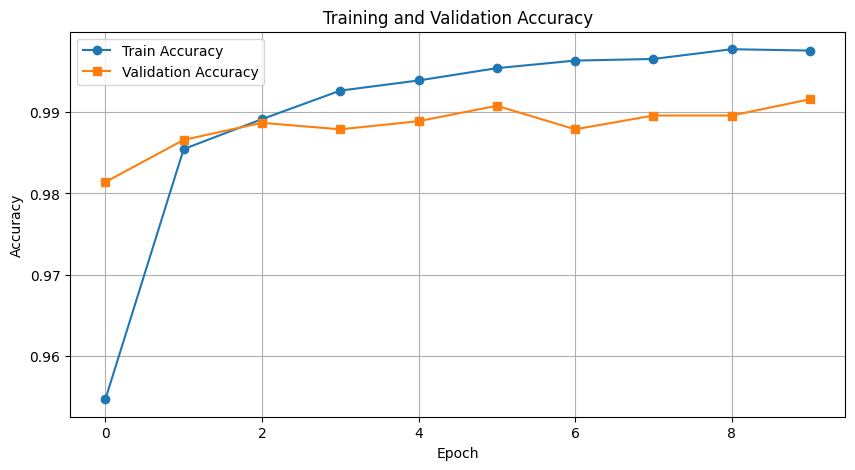

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


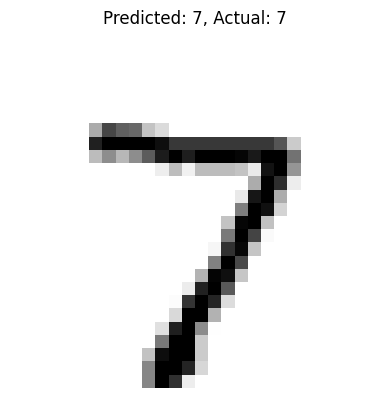

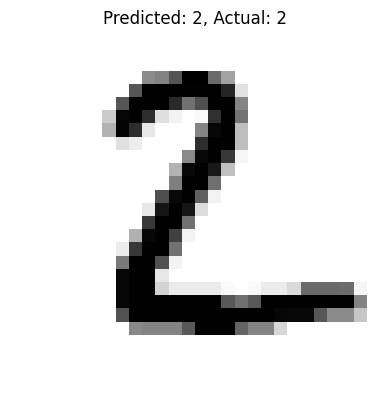

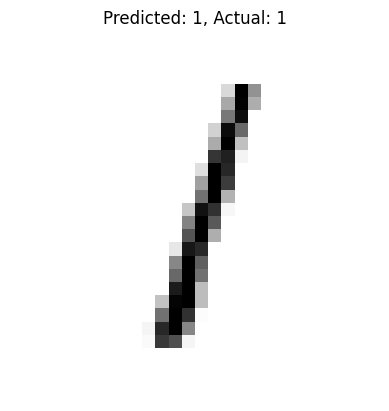

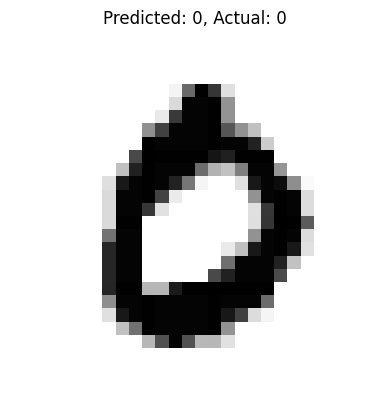

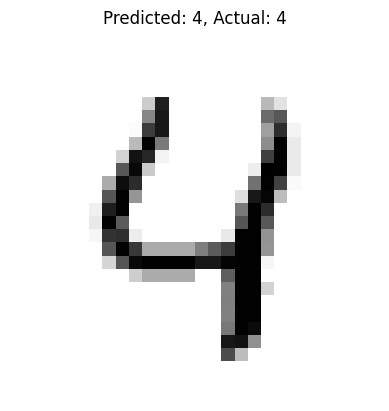

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0
# Reshape data for CNN (Adding channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()
# Predict on test images
predictions = model.predict(x_test)
# Display some test images with predictions
def display_predictions(index):
    plt.imshow(x_test[index].reshape(28,28), cmap=plt.cm.binary)
    plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
    plt.axis('off')
    plt.show()
# Show 5 sample predictions
for i in range(5):
    display_predictions(i)
